In [ ]:
'''
In this lab, we'll analyze the lb / unit ratio for different products.
We want to look for any outliers in the data, where shipments are abnormally heavy or light.
'''

In [1]:
### Loading in libraries

import pandas as pd
import numpy as np

In [8]:
'''
a) There is a file called 'Supply chain logisitcs problem.xlsx'. 
Read in the file as a datafrane and store it into a variable called "orders"
'''
orders = pd.read_excel("C:\\Users\\HOME\\Documents\\data_science\\ml_for_supply_chain_082024\\module3\\Supply chain logisitcs problem.xlsx", sheet_name='OrderList')
orders.head(20)

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34
5,1.447351e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3332,92.80
6,1.447320e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,1782,46.90
7,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,427,2.86
8,1.447219e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,1291,26.60
9,1.447398e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2294,62.20


In [9]:
orders.columns

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')

In [10]:
'''
b) Next, we'll create a column for the lb / unit ratio for each product. Create this column in the orders dataframe
and call it 'lb/unit_ratio'.
'''

orders['lb/unit_ratio'] = orders['Weight'] / orders['Unit quantity']
orders.columns

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight', 'lb/unit_ratio'],
      dtype='object')

In [12]:
'''
c) Next, we need to get the mean lb / unit ratio for each product. For easy comparision, broadcast this result back into
the original 'orders' dataframe. Your new column in the orders dataframe should be called 'avg_product_lb/unit_ratio'.
Hint: There are multiple ways to do this, but the easiest is with the transform method.
'''

orders['avg_product_lb/unit_ratio'] = orders.groupby('Product ID')['lb/unit_ratio'].transform('mean')
orders

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight,lb/unit_ratio,avg_product_lb/unit_ratio
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000,0.017698,0.022385
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.940000,0.027585,0.022385
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.200000,0.026255,0.022385
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.160000,0.019079,0.022385
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.340000,0.024198,0.022385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,1.447305e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118,0.006944,0.006204
9211,1.447319e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118,0.006944,0.006204
9212,1.447322e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,245,0.294265,0.001201,0.006204
9213,1.447145e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683430,PLANT03,PORT09,278,2.480000,0.008921,0.008921


In [13]:
'''
d) To look for outliers, let's analyze the squared difference between the 'lb/unit_ratio' and 'avg_product_lb/unit_ratio' columns within each row.
Create a new column in the orders dataframe called 'lb/unit_squared_diff' with the stored result.
Hint: Use the np.square() function.
'''

orders['lb/unit_squared_diff'] = np.square(orders['lb/unit_ratio'] - orders['avg_product_lb/unit_ratio'])

In [14]:
'''
e) Let's sort the orders by our new 'lb/unit_squared_diff' columns.
Create a new dataframe called 'outliers' to store the 10 orders with the highest lb/unit
deviations from the product mean.
Hint: Pay attention to the 'ascending keyword' if using the sort_values function.
'''

outliers = orders.sort_values(by = ['lb/unit_squared_diff'], ascending = False).head(10)

<Axes: >

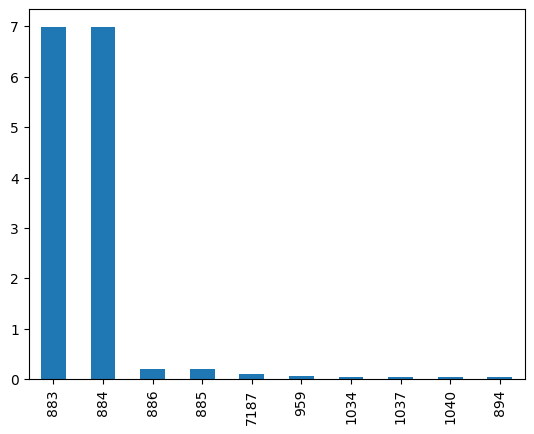

In [15]:
'''
f) Extra Credit: Let's plot our outliers in a bar chart. The y-axis should be our new 'lb/unit_squared_diff' column.
The x-axis can be the default index.
'''

outliers['lb/unit_squared_diff'].plot(kind = 'bar')